In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data

In [12]:
train = pd.read_csv("/home/neosoft/Desktop/jupyter/titanicdata/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
test = pd.read_csv("/home/neosoft/Desktop/jupyter/titanicdata/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
#displays size of training data
train.shape

(891, 12)

In [16]:
#count of survived values 
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [17]:
#It retrieves only keys (categorical data)
train['Survived'].value_counts().keys()

Int64Index([0, 1], dtype='int64')

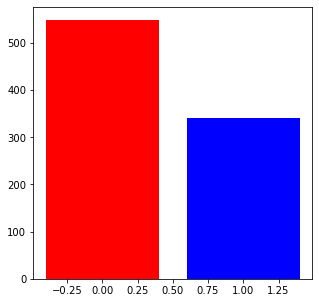

In [18]:
#Plotting bar graph for Survived column
plt.figure(figsize=(5,5))

#Red color represents how many died and blue color represents how many survived
plt.bar(list(train['Survived'].value_counts().keys()), list(train['Survived'].value_counts()), color=['red', 'blue'])

plt.show()

In [19]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

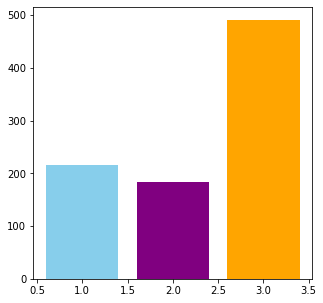

In [20]:
#Plotting bar graph for Pclass column
plt.figure(figsize=(5,5))

#skyblue color represents passenger class 1, purple color represents passenger class 2 and orange color represents passenger class 3.
plt.bar(list(train['Pclass'].value_counts().keys()), list(train['Pclass'].value_counts()), color=['orange', 'skyblue', 'purple'])

plt.show()

In [21]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

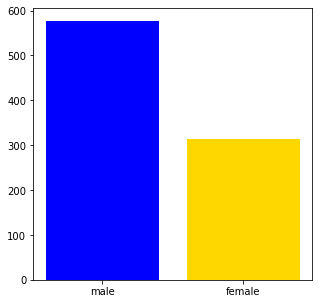

In [22]:
#Plotting bar graph for Sex column
plt.figure(figsize=(5,5))

#Blue color represents male and gold color represents female
plt.bar(list(train['Sex'].value_counts().keys()), list(train['Sex'].value_counts()), color=['blue', 'gold'])

plt.show()

In [23]:
train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

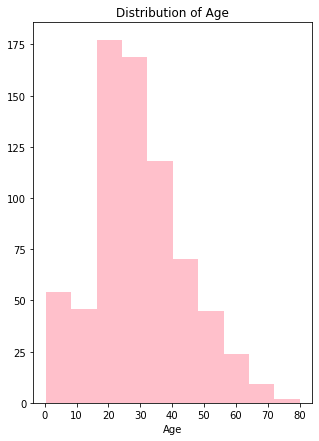

In [24]:
#Plotting bar graph for Age column
plt.figure(figsize=(5,7))
plt.hist(train['Age'], color="pink")
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

# find missing data

In [25]:
#returns number of values in Survived Column
train['Survived'].isna().sum()

0

In [26]:
#returns number of values in Age Column
train['Age'].isna().sum()

177

In [27]:
#Deleting null values in Age column
train = train.dropna()

In [28]:
train['Age'].isna().sum()

0

In [29]:
train['Age'].isna().sum()

0

In [30]:
x_train = train[['Age']]

In [31]:
y_train = train[['Survived']]

# training tada with tree classifier

In [32]:
#building model
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [33]:
test['Age'].isna().sum()

86

In [34]:
test = test.dropna()

In [35]:
test['Age'].isna().sum()

0

In [36]:
x_test = test[['Age']]

# predict the test data

In [37]:
#Predicting values
y_predict = dtc_model.predict(x_test)
y_predict

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1])

In [42]:
test_data = np.array([30]).reshape(-1,1)
test_data


array([[30]])

In [43]:
dtc_model.predict(test_data)

array([1])